In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform

# Exercise 1 : Linear SVM - Influence of parameter C

In [2]:
dataset = pd.read_csv('LineaireNoisy2.csv', delimiter=';')
dataset

,x1,x2,y
0,10.00,5.00,1
1,9.50,10.00,-1
2,2.30,5.25,-1
3,3.40,3.88,-1
4,7.66,4.46,-1
...,...,...,...
147,15.01,15.67,1
148,16.05,14.70,1
149,15.65,18.23,1
150,18.85,17.43,1


In [3]:
dataset.y.value_counts()

 1    76
-1    76
Name: y, dtype: int64

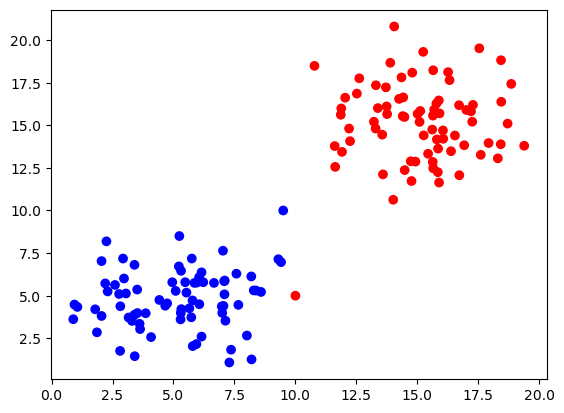

In [6]:
plt.scatter(dataset['x1'], dataset['x2'], c=['red' if x==1 else 'blue' for x in dataset['y']])#, label='Trainning data', marker='x')

## Fitting a linear SVM to this dataset

In [7]:
from sklearn import svm

In [9]:
model_svm = svm.SVC(C = 1000, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1000

In [11]:
model_svm.fit(dataset.iloc[:,:-1], dataset.y)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=1000, kernel='linear')

In [12]:
model_svm.support_vectors_
# the support vectors found by the SVC. Here 3 support vectors, called sv1, sv2 and sv3

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [13]:
model_svm.support_
# the index of the support vectors in the dataset. you can check 

array([ 61,   0, 102], dtype=int32)

In [14]:
model_svm.dual_coef_
# the lagrange coefficients associated to the support vectors (w1, w2 and w3)

array([[-4.04838982,  3.46935572,  0.5790341 ]])

In [15]:
model_svm.intercept_
# the constant of the model (w0)

array([-26.58177221])

In [104]:
model_svm.decision_function(dataset.iloc[:,0:2])

array([  0.99939461,  -1.24146694, -20.91106359, -17.56196996,
        -5.55799375, -10.10885491,  -3.90820838, -21.76677542,
       -10.39661987, -18.76122684, -13.09442159, -15.41560301,
       -22.18719605,  -3.62254841, -16.270259  , -17.78689301,
        -7.43347457, -17.49249741, -17.13467421,  -7.38323704,
       -19.55155385, -12.85903139, -16.87852969, -18.2173496 ,
        -4.326833  , -10.06555698,  -6.05402189, -12.56073479,
       -12.99187378, -11.72577727,  -7.35536312, -12.18367657,
        -7.47454528, -24.64731586, -10.16020606, -18.04294081,
       -14.80779576, -21.27223434,  -1.34002374, -17.23756323,
        -7.28065699, -13.86610599, -19.4385644 , -10.60134877,
        -7.27867425, -10.47188617,  -5.97832438, -10.88208413,
        -3.4990018 , -12.14969994,  -4.26845225, -20.12138674,
       -11.96792035, -11.42924445, -14.0703392 , -24.64815275,
        -6.91062837, -19.13289699, -16.7708383 ,  -8.60993663,
        -9.54134596,  -0.9996973 , -10.91971728,  -7.86

In [1]:
def svm_draw(model_svm, xmin, xmax, dataset):
    
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))


    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')
    # Constructing a hyperplane using a formula.
    w = model_svm.coef_[0]           # w consists of 2 elements
    b = model_svm.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(xmin, xmax)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

    plt.plot(x_points, y_points, c='g');

    plt.scatter(model_svm.support_vectors_[:, 0],
                model_svm.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=1);

    # Step 2 (unit-vector):
    w_hat = model_svm.coef_[0] / (np.sqrt(np.sum(model_svm.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model_svm.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
             points_of_line_above[:, 1], 
             'g--', 
             linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
             points_of_line_below[:, 1], 
             'g--',
             linewidth=2)

In [2]:
svm_draw(model_svm, 9.3, 10.7, dataset)

NameError: name 'model_svm' is not defined

# Exercise 2: Choosing C using train/val/test split

In [44]:
# Load the dataset
dataset = pd.read_csv("spam7.csv", decimal=",", index_col=0, delimiter = ";")
dataset
# A description about this dataset is given here:
# http://math.furman.edu/~dcs/courses/math47/R/library/DAAG/html/spam7.html

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [49]:
from sklearn.preprocessing import StandardScaler
# First, get the features
X = dataset.iloc[:,0:6]
# then create a scaler on X
scaler = StandardScaler().fit(X)
# Apply it to X
X = scaler.transform(X)
# create a dataframe with X
X = pd.DataFrame(X, columns=dataset.columns[0:6])
X
# You should see that the features have been transformed
print(X.dollar.mean())
# the mean of feature 'dollar' is now 0 (very close to 0)
# it is the same for the other features

1.1906098314983634e-14


In [51]:
# Now we will add the target variable inside X
X['yesno'] = dataset.yesno
X
# now our dataset is called X

,crl.tot,dollar,bang,money,n000,make,yesno
0,-0.008724,-0.308355,0.624007,-0.212994,-0.290209,-0.342434,y
1,1.228324,0.423783,0.126203,0.758565,0.937491,0.345359,y
2,3.258733,0.440053,0.008496,-0.077428,3.021726,-0.145921,y
3,-0.152222,-0.308355,-0.161934,-0.212994,-0.290209,-0.342434,y
4,-0.152222,-0.308355,-0.164387,-0.212994,-0.290209,-0.342434,y
...,...,...,...,...,...,...,...
4596,-0.322110,-0.308355,-0.329912,-0.212994,-0.290209,0.672880,n
4597,-0.444165,-0.308355,0.102907,-0.212994,-0.290209,-0.342434,n
4598,-0.272628,-0.308355,-0.329912,-0.212994,-0.290209,0.640128,n
4599,-0.338604,-0.308355,-0.329912,-0.212994,-0.290209,2.801763,n


# Exercise 3: Non-linear SVM

In [209]:
# Load a dataset
dataset = pd.read_csv("SepNonLineaire.csv")
dataset


,x1,x2,y
0,1.5,4.0,1
1,1.0,2.0,1
2,0.0,0.0,1
3,1.0,4.0,1
4,0.5,3.0,1
...,...,...,...
145,-2.8,-3.3,0
146,-2.8,1.0,0
147,-2.8,3.0,0
148,-2.4,3.0,0


In [233]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

In [5]:
draw_boundary(model_svm, data_train, -3,4,-5,9)

NameError: name 'draw_boundary' is not defined